Shoutout to [@Vladimir Iglovikov](https://www.kaggle.com/iglovikov) for providing us this amazing image augmentation library! Heres how you can apply it to this competition.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

from PIL import Image
import cv2

import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

In [2]:
!pip install albumentations

In [8]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose, RandomGamma, ElasticTransform, ChannelShuffle,RGBShift, Rotate
)

### Load a demo image

In [47]:
import ast
train_df = pd.read_csv('train.csv')

# Let's expand the bounding box coordinates and calculate the area of all the bboxes
train_df[['x_min','y_min', 'width', 'height']] = pd.DataFrame([ast.literal_eval(x) for x in train_df.bbox.tolist()], index= train_df.index)
train_df = train_df[['image_id', 'bbox', 'source', 'x_min', 'y_min', 'width', 'height']]
train_df['area'] = train_df['width'] * train_df['height']
train_df['x_max'] = train_df['x_min'] + train_df['width']
train_df['y_max'] = train_df['y_min'] + train_df['height']
train_df = train_df.drop(['bbox', 'source'], axis=1)
train_df = train_df[['image_id', 'x_min', 'y_min', 'x_max', 'y_max', 'width', 'height', 'area']]

# There are some buggy annonations in training images having huge bounding boxes. Let's remove those bboxes
train_df = train_df[train_df['area'] < 100000]

train_df.head()

,image_id,x_min,y_min,x_max,y_max,width,height,area
0,b6ab77fd7,834.0,222.0,890.0,258.0,56.0,36.0,2016.0
1,b6ab77fd7,226.0,548.0,356.0,606.0,130.0,58.0,7540.0
2,b6ab77fd7,377.0,504.0,451.0,664.0,74.0,160.0,11840.0
3,b6ab77fd7,834.0,95.0,943.0,202.0,109.0,107.0,11663.0
4,b6ab77fd7,26.0,144.0,150.0,261.0,124.0,117.0,14508.0


In [52]:
image = np.array(Image.open("train/b6ab77fd7.jpg"))

In [50]:
pascal_voc_boxes = train_df[train_df['image_id'] == 'b6ab77fd7'][['x_min', 'y_min', 'x_max', 'y_max']].astype(np.int32).values

In [55]:
labels = np.ones((len(pascal_voc_boxes), ))

In [51]:
pascal_voc_boxes

array([[ 834,  222,  890,  258],
       [ 226,  548,  356,  606],
       [ 377,  504,  451,  664],
       [ 834,   95,  943,  202],
       [  26,  144,  150,  261],
       [ 569,  382,  688,  493],
       [  52,  602,  134,  647],
       [ 627,  302,  749,  377],
       [ 412,  367,  480,  449],
       [ 953,  220, 1009,  323],
       [  30,   70,  156,  203],
       [  35,  541,   81,  587],
       [ 103,   60,  220,  143],
       [ 417,    4,  527,   95],
       [ 764,  299,  883,  392],
       [ 539,   58,  597,  188],
       [ 139,  274,  260,  350],
       [ 461,  634,  579,  698],
       [ 215,  634,  328,  709],
       [ 134,  903,  261,  952],
       [ 737,  545,  824,  593],
       [ 292,  930,  335,  976],
       [   0,  827,   86,  885],
       [ 324,   44,  381,  114],
       [ 663,  794,  779,  858],
       [ 325,  730,  401,  802],
       [ 155,  554,  229,  624],
       [ 783,  833,  853,  924],
       [ 534,   46,  607,  270],
       [ 155,  281,  261,  419],
       [ 1

In [53]:
aug = Compose([Flip(p=1),], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [56]:
aug_result = aug(image=image, bboxes=pascal_voc_boxes, labels=labels)

In [59]:
aug_result['image'].shape

(1024, 1024, 3)

In [62]:
aug_result['bboxes']

[(134.0, 766.0, 190.0, 802.0),
 (668.0, 418.0, 798.0, 476.0),
 (573.0, 360.0, 647.0, 520.0),
 (81.0, 822.0, 190.0, 929.0),
 (874.0, 763.0, 998.0, 880.0),
 (336.0, 531.0, 455.0, 642.0),
 (890.0, 377.0, 972.0, 422.0),
 (275.0, 647.0, 397.0, 722.0),
 (544.0, 575.0, 612.0, 657.0),
 (15.0, 701.0, 71.0, 804.0),
 (868.0, 821.0, 994.0, 954.0),
 (943.0, 437.0, 989.0, 483.0),
 (804.0, 881.0, 921.0, 964.0),
 (497.0, 929.0, 607.0, 1020.0),
 (141.0, 632.0, 260.0, 725.0),
 (427.0, 836.0, 485.0, 966.0),
 (764.0, 674.0, 885.0, 750.0),
 (445.0, 326.0, 563.0, 390.0),
 (696.0, 315.0, 809.0, 390.0),
 (763.0, 72.0, 890.0, 121.0),
 (200.0, 431.0, 287.0, 479.0),
 (689.0, 48.0, 732.0, 94.0),
 (938.0, 139.0, 1024.0, 197.0),
 (643.0, 910.0, 700.0, 980.0),
 (245.0, 166.0, 361.0, 230.0),
 (623.0, 222.0, 699.0, 294.0),
 (795.0, 400.0, 869.0, 470.0),
 (171.0, 100.0, 241.0, 191.0),
 (417.0, 754.0, 490.0, 978.0),
 (763.0, 605.0, 869.0, 743.0),
 (841.0, 709.0, 923.0, 784.0),
 (361.0, 612.0, 441.0, 695.0),
 (896.0, 388

In [63]:
aug_result['labels']

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

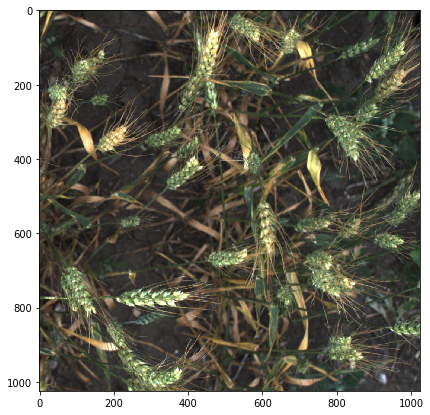

In [35]:
#Image.fromarray(HorizontalFlip(p=1)(image=image)['image'])

plt.figure(figsize=(7,7))
plt.imshow(Image.fromarray(HorizontalFlip(p=1)(image=image)['image']))
plt.show()

In [15]:
def strong_aug(p=1):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        #HueSaturationValue(p=0.3),
    ], p=p)

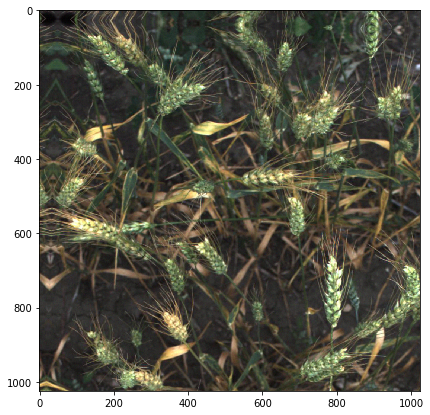

In [16]:
aug = strong_aug(p=1)

plt.figure(figsize=(7,7))
plt.imshow(Image.fromarray(augment(aug,np.array(demo_rgb))))
plt.show()